In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv(r"C:\Users\sopon\Downloads\raw_data\data.csv")

In [156]:
country_codes = pd.read_csv(r"C:\Users\sopon\Downloads\domains_location.csv")

In [157]:
country_codes.head()

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [158]:
df['domain'] = df['url'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)

In [159]:
country_codes

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China
...,...,...,...
37797,zz.diena.lv,LG,Latvia
37798,zz.fjnet.cn,CH,China
37799,zz.mnw.cn,CH,China
37800,zz7.it,IT,Italy


In [160]:
df1 = df.merge(country_codes, left_on='domain', right_on='SourceCommonName')

In [161]:
df1

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,domain,SourceCommonName,location,Country
0,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,indianexpress.com,indianexpress.com,IN,India
1,89555,NaN,The Indian Express,New York Times,No nation in the world is buying more planes t...,India's largest airlines have ordered nearly 1...,https://indianexpress.com/article/business/avi...,https://images.indianexpress.com/2023/11/igiai...,2023-11-02 05:48:58.000000,No nation in the world is buying as many airpl...,Nepal,Written by Alex Travelli and Hari Kumar No nat...,indianexpress.com,indianexpress.com,IN,India
2,89631,NaN,The Indian Express,"Ravik Bhattacharya, Atri Mitra",Rats! Kolkata has a rodent problem: ‘They are ...,"Flyovers to cable lines, food and papers in th...",https://indianexpress.com/article/cities/kolka...,https://images.indianexpress.com/2023/10/ratss...,2023-10-04 09:53:05.000000,"It’s a rat race in Kolkata and so far, the rod...",Nepal,"It’s a rat race in Kolkata — and so far, the r...",indianexpress.com,indianexpress.com,IN,India
3,90007,NaN,The Indian Express,Tech Desk,"Musk to launch new subscription plans for X, o...",The move comes after X started experimenting w...,https://indianexpress.com/article/technology/t...,https://images.indianexpress.com/2023/10/x-soc...,2023-10-21 12:38:17.000000,"X, the social media platform formerly known as...",New Zealand,"X, the social media platform formerly known as...",indianexpress.com,indianexpress.com,IN,India
4,90014,NaN,The Indian Express,Neha Banka,"From New Zealand to India, a maths teacher hel...",Subash Chandar’s free online classes have turn...,https://indianexpress.com/article/cities/kolka...,https://images.indianexpress.com/2023/10/teach...,2023-10-04 08:56:02.000000,"Growing up in New Zealand, Subash Chandar alwa...",New Zealand,"Growing up in New Zealand, Subash Chandar alwa...",indianexpress.com,indianexpress.com,IN,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15627,128200,NaN,People.cn,F_400991,Innovation on agenda at int'l climate forum in...,People attend an international energy and clim...,http://en.people.cn/n3/2023/1103/c90000-200926...,NaN,2023-11-03 00:57:57.000000,"(Xinhua) 08:48, November 03, 2023\nPeople atte...",Climate,NaN,en.people.cn,en.people.cn,CH,China
15628,131059,NaN,Linuxgizmos.com,Giorgio Mendoza,New BeagleV Single Board Computer adopts Micro...,BeagleBoard.org has announced the release of B...,https://linuxgizmos.com/new-beaglev-single-boa...,https://linuxgizmos.com/files/BeagleV-Fire-1-1...,2023-11-03 01:45:50.000000,TwitterFacebook LinkedInRedditPinterestEmail\n...,Design,NaN,linuxgizmos.com,linuxgizmos.com,US,United States
15629,83319,NaN,Liliputing,Brad Linder,Radxa Zero 3W is a Pi Zero-sized PC with a RK3...,The Radxa Zero 3W is a single-board computer t...,https://liliputing.com/radxa-zero-3w-is-a-pi-z...,https://liliputing.com/wp-content/uploads/2023...,2023-10-30 18:13:47.000000,The Radxa Zero 3W is a single-board computer t...,Mali,NaN,liliputing.com,liliputing.com,CH,China
15630,83370,NaN,Liliputing,Brad Linder,Amazon Fire HD 10 (2023) is now available for ...,Amazon’s newest Fire HD 10 tablet is thinner a...,https://liliputing.com/amazon-fire-hd-10-2023-...,https://liliputing.com/wp-content/uploads/2023...,2023-10-20 18:09:16.000000,Amazon’s newest Fire HD 10 tablet is thinner a...,Mali,NaN,liliputing.com,liliputing.com,CH,China


In [162]:
country_domain_counts = df1.groupby('Country')['domain'].nunique()

In [163]:
country_domain_counts_df = country_domain_counts.reset_index()
country_domain_counts_df.columns = ['Country', 'Media Organization Count']

In [164]:
country_domain_counts_df = country_domain_counts_df.sort_values(by='Media Organization Count', ascending=False)

**Top 10 countries with the highest number of news media organizations**

In [165]:
print(country_domain_counts_df.head(10))

           Country  Media Organization Count
23   United States                       201
17          Russia                        11
11           Japan                         9
2           Canada                         6
22  United Kingdom                         5
3            China                         4
24         Vietnam                         2
16         Nigeria                         2
6           France                         2
7          Germany                         2


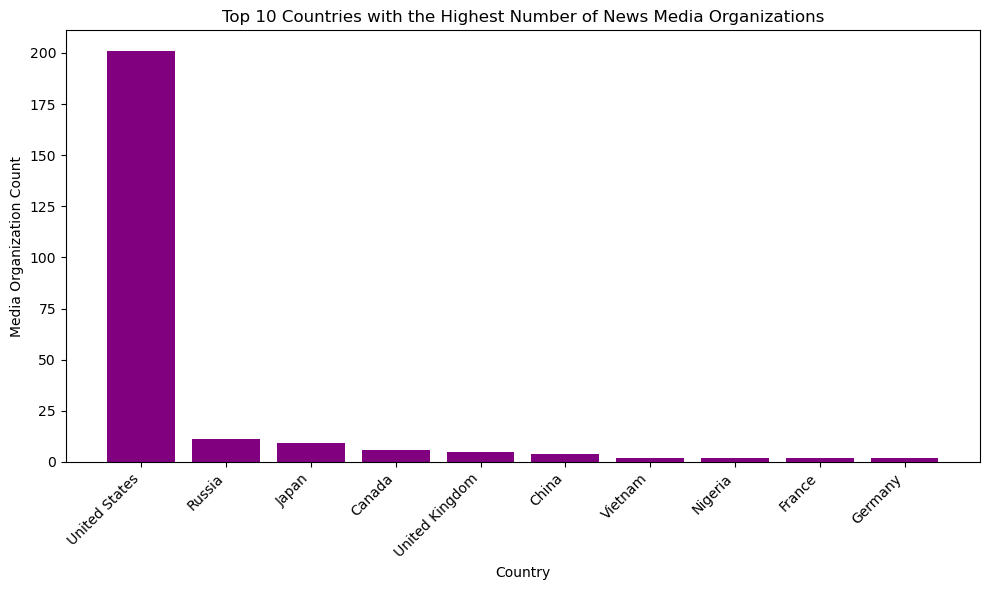

In [166]:
plt.figure(figsize=(10, 6))
plt.bar(country_domain_counts_df['Country'][:10], country_domain_counts_df['Media Organization Count'][:10], color='purple')
plt.title('Top 10 Countries with the Highest Number of News Media Organizations')
plt.xlabel('Country')
plt.ylabel('Media Organization Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [167]:
df1['Country'].unique()

array(['India', 'United States', 'Nigeria', 'Japan', 'China', 'Russia',
       'Mauritius', 'United Kingdom', 'Hong Kong', 'Canada', 'Germany',
       'Malaysia', 'Jordan', 'British Indian Ocean Territory', 'Finland',
       'Ukraine', 'Vietnam', 'South Korea', 'Tuvalu', 'Israel', 'Taiwan',
       'Australia', 'France', 'Libya', 'Colombia'], dtype=object)

In [168]:
Countries = ['India', 'United States', 'Nigeria', 'Japan', 'China', 'Russia',
       'Mauritius', 'United Kingdom', 'Hong Kong', 'Canada', 'Germany',
       'Malaysia', 'Jordan', 'British Indian Ocean Territory', 'Finland',
       'Ukraine', 'Vietnam', 'South Korea', 'Tuvalu', 'Israel', 'Taiwan',
       'Australia', 'France', 'Libya', 'Colombia']

In [169]:
def contains_country(text):
    for country in Countries:
        if country.lower() in text.lower():
            return country
    return None

In [170]:
df['mentioned_country'] = df['content'].apply(contains_country)

In [171]:
country_article_counts = df.groupby('mentioned_country').size().reset_index(name='article_count')

In [172]:
country_article_counts = country_article_counts.dropna()

In [173]:
country_article_counts = country_article_counts.sort_values(by='article_count', ascending=False)

**Countries with the Highest Number of Articles Mentioning Them**

In [174]:
country_article_counts.head(10)

,mentioned_country,article_count
8,India,3746
9,Israel,3575
16,Russia,1884
22,United States,1584
2,China,1569
15,Nigeria,834
1,Canada,757
0,Australia,715
10,Japan,714
20,Ukraine,638


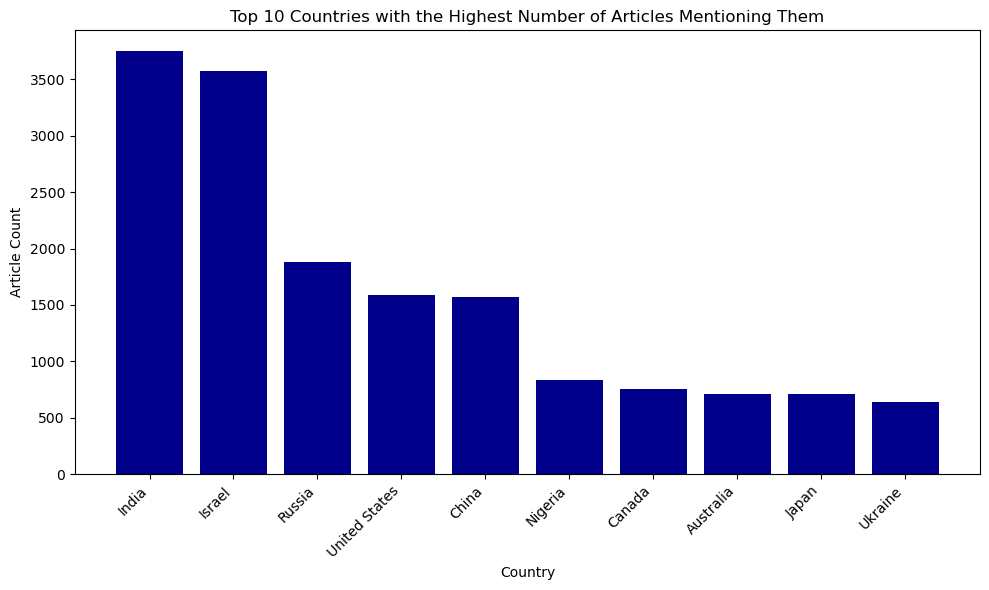

In [175]:
plt.figure(figsize=(10, 6))
plt.bar(country_article_counts['mentioned_country'][:10], country_article_counts['article_count'][:10], color='darkblue')
plt.title('Top 10 Countries with the Highest Number of Articles Mentioning Them')
plt.xlabel('Country')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [176]:
country_to_region = {
    'US': 'US',
    'China': 'China',
    'Russia': 'Russia',
    'Ukraine': 'Ukraine'
}

african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
middle_east_countries = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestinian Territories', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']

In [177]:
def categorize_country(country):
    if country in country_to_region:
        return country_to_region[country]
    elif country in african_countries:
        return 'Africa'
    elif country in eu_countries:
        return 'EU'
    elif country in middle_east_countries:
        return 'Middle East'
    else:
        return None

In [186]:
country_article_counts['mentioned_region'] = country_article_counts['mentioned_country'].apply(categorize_country)

In [200]:
region_article_counts = country_article_counts.groupby('mentioned_region').sum('article_count').reset_index()

In [203]:
region_article_counts = region_article_counts.sort_values(by='article_count', ascending=False)

**Regions with the Highest Number of Articles Mentioning Them**

In [204]:
region_article_counts

,mentioned_region,article_count
3,Middle East,3879
4,Russia,1884
1,China,1569
2,EU,1071
0,Africa,920
5,Ukraine,638


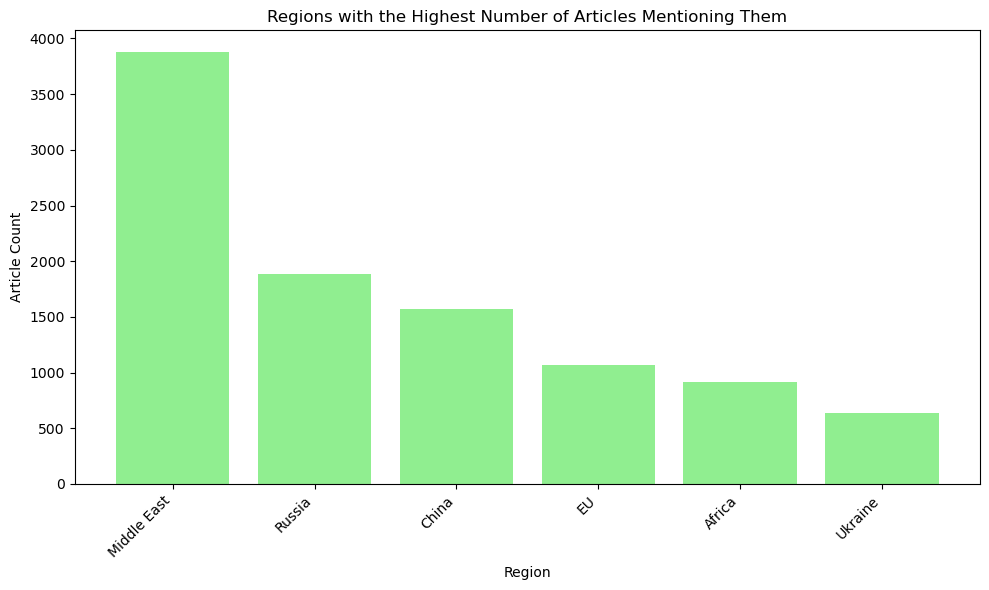

In [205]:
plt.figure(figsize=(10, 6))
plt.bar(region_article_counts['mentioned_region'][:10], region_article_counts['article_count'][:10], color='lightgreen')
plt.title('Regions with the Highest Number of Articles Mentioning Them')
plt.xlabel('Region')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()